# Chapter 1 - Introduction

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/ISLP_labs/blob/main/Ch01-lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/ISLP_labs/blob/main/Ch01-lab.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Getting Started

To run the labs in this book, you will need two things:

* An installation of `Python3`, which is the specific version of `Python`  used in the labs.
* Access to  `Jupyter`, a very popular `Python` interface that runs code through a file called a *notebook*.

You can download and install  `Python3`   by following the instructions available at [anaconda.com](http://anaconda.com).

There are a number of ways to get access to `Jupyter`. Here are just a few:

 * Using Google's `Colaboratory` service: [colab.research.google.com/](https://colab.research.google.com/).
 * Using `JupyterHub`, available at [jupyter.org/hub](https://jupyter.org/hub).
 * Using your own `jupyter` installation. Installation instructions are available at [jupyter.org/install](https://jupyter.org/install).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns  #Samuel Norman Seaborn
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

%matplotlib inline

plt.style.use('seaborn-v0_8-white') #or plt.style.use('seaborn-white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

`Python` is a general-purpose language with statistics modules. When it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of `Python` is an invaluable asset

## Pandas

### Constructing data

One way to think a `Series` is regarded it as a labeled array. Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Since we did not specify an index for the data, a default one consisting of the integers $0$ through $N - 1$ (where $N$ is the length of the data) is created. Often you’ll want to create a Series with an index identifying each data point with a label:

In [3]:
s2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
s2

d    4
b    7
a   -5
c    3
dtype: int64

Another way to think about a `Series` is as a fixed-length, ordered dictionary, as it is a mapping of index values to data values.

In [4]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
s3 = pd.Series(sdata)
s3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

We will store and manipulate this data in a `pandas.DataFrame`, from the `pandas` module. It is the `Python` equivalent of the spreadsheet table. It is different from a 2D `NumPy` array as it has named columns, can contain a mixture of different data types by column, and has elaborate mechanisms. The `DataFrame` has both a row and column index.

In [5]:
dates = pd.date_range("20230901", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641
2023-09-02,-0.146296,1.580351,-0.648527,0.610110
2023-09-03,-0.396575,-0.794965,0.741712,-0.322563
2023-09-04,0.045320,0.669434,0.525629,-1.182543
2023-09-05,1.337641,1.378574,0.565101,0.565541
2023-09-06,0.343288,0.803763,-0.545542,0.900021


Note that `pandas` is good at [handling time series data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html).

A `pandas.DataFrame` can also be seen as a dictionary of 1D ‘series’, eg arrays or lists. If we have 3 `numpy` arrays:

In [6]:
t = np.arange(10) #start from 0
sin_t = np.sin(t)
cos_t = np.cos(t)
df2 = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})
df2

,t,sin,cos
0,0,0.000000,1.000000
1,1,0.841471,0.540302
2,2,0.909297,-0.416147
3,3,0.141120,-0.989992
4,4,-0.756802,-0.653644
5,5,-0.958924,0.283662
6,6,-0.279415,0.960170
7,7,0.656987,0.753902
8,8,0.989358,-0.145500
9,9,0.412118,-0.911130


One of the most common used is from a dictionary of equal-length lists or `NumPy` arrays:

In [7]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


The columns of the resulting `DataFrame` have different `dtypes`.

In [8]:
frame.dtypes

state     object
year       int64
pop      float64
dtype: object

### Viewing data

The `head/tail/info` methods and the dtypes attribute are convenient for a first check. Use `head()` and `tail()` to view the top and bottom rows of the frame respectively:

In [9]:
df.head() # Get the first 5 rows of data

,A,B,C,D
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641
2023-09-02,-0.146296,1.580351,-0.648527,0.610110
2023-09-03,-0.396575,-0.794965,0.741712,-0.322563
2023-09-04,0.045320,0.669434,0.525629,-1.182543
2023-09-05,1.337641,1.378574,0.565101,0.565541


In [10]:
df.tail(3) # Get the last 3 rows of data

,A,B,C,D
2023-09-04,0.045320,0.669434,0.525629,-1.182543
2023-09-05,1.337641,1.378574,0.565101,0.565541
2023-09-06,0.343288,0.803763,-0.545542,0.900021


In [11]:
df.index # Both the index and columns are array-like object that belongs to pd.Index

DatetimeIndex(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05', '2023-09-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`describe()` shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.053198,0.485893,0.136672,-0.064013
std,0.750693,1.022601,0.597476,0.882193
min,-0.864191,-0.794965,-0.648527,-1.182543
25%,-0.334005,-0.373991,-0.363741,-0.796622
50%,-0.050488,0.736599,0.353645,0.121489
75%,0.268796,1.234871,0.555233,0.598967
max,1.337641,1.580351,0.741712,0.900021


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-09-01 to 2023-09-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [15]:
df.shape

(6, 4)

Sorting by an axis:

In [16]:
df.sort_index(axis=1, ascending=False) # Sorting by columns in descending order

,D,C,B,A
2023-09-01,-0.954641,0.181661,-0.721800,-0.864191
2023-09-02,0.610110,-0.648527,1.580351,-0.146296
2023-09-03,-0.322563,0.741712,-0.794965,-0.396575
2023-09-04,-1.182543,0.525629,0.669434,0.045320
2023-09-05,0.565541,0.565101,1.378574,1.337641
2023-09-06,0.900021,-0.545542,0.803763,0.343288


Sorting by values:

In [17]:
df.sort_values(by="B")

,A,B,C,D
2023-09-03,-0.396575,-0.794965,0.741712,-0.322563
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641
2023-09-04,0.045320,0.669434,0.525629,-1.182543
2023-09-06,0.343288,0.803763,-0.545542,0.900021
2023-09-05,1.337641,1.378574,0.565101,0.565541
2023-09-02,-0.146296,1.580351,-0.648527,0.610110


### Selecting data

Selecting a single column, which yields a `Series`, equivalent to `df.A`:

In [18]:
df["A"]

2023-09-01   -0.864191
2023-09-02   -0.146296
2023-09-03   -0.396575
2023-09-04    0.045320
2023-09-05    1.337641
2023-09-06    0.343288
Freq: D, Name: A, dtype: float64

Selecting via slicing slices the rows.

In [19]:
df[0:3] # df["20230901":"20230903"] also works

,A,B,C,D
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641
2023-09-02,-0.146296,1.580351,-0.648527,0.610110
2023-09-03,-0.396575,-0.794965,0.741712,-0.322563


It is highly recommended to use the attribute `loc` (by label) or `iloc` (by position) to select the data.

Selection by labels of columns or rows

In [20]:
df.loc[:, ["A", "C"]] # Fancy indexing in the second dimension

,A,C
2023-09-01,-0.864191,0.181661
2023-09-02,-0.146296,-0.648527
2023-09-03,-0.396575,0.741712
2023-09-04,0.045320,0.525629
2023-09-05,1.337641,0.565101
2023-09-06,0.343288,-0.545542


In [21]:
df.loc["20230901":"20230904","A":"C"] # Note that 20230904 and C are included!

,A,B,C
2023-09-01,-0.864191,-0.721800,0.181661
2023-09-02,-0.146296,1.580351,-0.648527
2023-09-03,-0.396575,-0.794965,0.741712
2023-09-04,0.045320,0.669434,0.525629


Selection by position (Simiar to `NumPy` and `Python`)

In [22]:
df.iloc[3]

A    0.045320
B    0.669434
C    0.525629
D   -1.182543
Name: 2023-09-04 00:00:00, dtype: float64

In [23]:
df.iloc[3:5, 0:2] # Note that the 5 row and 2 column are excluded!

,A,B
2023-09-04,0.045320,0.669434
2023-09-05,1.337641,1.378574


Boolean (fancy) indexing

In [24]:
df[df["A"] > 0]

,A,B,C,D
2023-09-04,0.045320,0.669434,0.525629,-1.182543
2023-09-05,1.337641,1.378574,0.565101,0.565541
2023-09-06,0.343288,0.803763,-0.545542,0.900021


Create a new column by assigning the output to the `DataFrame` with a new column name in between the `[]`.

In [25]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"] # Same length with other Series
df2

,A,B,C,D,E
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641,one
2023-09-02,-0.146296,1.580351,-0.648527,0.610110,one
2023-09-03,-0.396575,-0.794965,0.741712,-0.322563,two
2023-09-04,0.045320,0.669434,0.525629,-1.182543,three
2023-09-05,1.337641,1.378574,0.565101,0.565541,four
2023-09-06,0.343288,0.803763,-0.545542,0.900021,three


An important method on `pandas` objects is `reindex()`, which means to create a new object with the values rearranged to align with the new index.

In [26]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [27]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"]) # Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
obj2  # pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. Check dropna(), fillna() and isna()

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

### Computation about data

Reduction works as `NumPy` `array`:

In [28]:
df.mean()

A    0.053198
B    0.485893
C    0.136672
D   -0.064013
dtype: float64

Binary operator works element-wise (no need to loop over rows) and support the broadcasting:

In [29]:
df2 = df.copy()
df2 + df

,A,B,C,D
2023-09-01,-1.728381,-1.443600,0.363322,-1.909283
2023-09-02,-0.292592,3.160701,-1.297054,1.220219
2023-09-03,-0.793149,-1.589930,1.483424,-0.645125
2023-09-04,0.090640,1.338868,1.051258,-2.365087
2023-09-05,2.675282,2.757147,1.130202,1.131082
2023-09-06,0.686577,1.607527,-1.091083,1.800043


We can apply other `NumPy` method:

In [30]:
df.apply(np.cumsum)

,A,B,C,D
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641
2023-09-02,-1.010487,0.858551,-0.466866,-0.344532
2023-09-03,-1.407061,0.063586,0.274846,-0.667094
2023-09-04,-1.361741,0.733020,0.800475,-1.849638
2023-09-05,-0.024100,2.111593,1.365576,-1.284097
2023-09-06,0.319188,2.915357,0.820034,-0.384075


### Merge and Group data

Multiple tables can be concatenated both column-wise and row-wise using the `concat()` function.

In [31]:
pieces = [df[:2], df[2:4], df[4:]]
pieces, type(pieces[0])

([                   A         B         C         D
  2023-09-01 -0.864191 -0.721800  0.181661 -0.954641
  2023-09-02 -0.146296  1.580351 -0.648527  0.610110,
                     A         B         C         D
  2023-09-03 -0.396575 -0.794965  0.741712 -0.322563
  2023-09-04  0.045320  0.669434  0.525629 -1.182543,
                     A         B         C         D
  2023-09-05  1.337641  1.378574  0.565101  0.565541
  2023-09-06  0.343288  0.803763 -0.545542  0.900021],
 pandas.core.frame.DataFrame)

In [32]:
pd.concat(pieces) # Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive.

,A,B,C,D
2023-09-01,-0.864191,-0.721800,0.181661,-0.954641
2023-09-02,-0.146296,1.580351,-0.648527,0.610110
2023-09-03,-0.396575,-0.794965,0.741712,-0.322563
2023-09-04,0.045320,0.669434,0.525629,-1.182543
2023-09-05,1.337641,1.378574,0.565101,0.565541
2023-09-06,0.343288,0.803763,-0.545542,0.900021


For database-like merging/joining of tables, use the [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function.

In [33]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.397524,-1.169296
1,bar,one,-0.599889,-0.810535
2,foo,two,0.890349,-0.124155
3,bar,three,-0.304969,-0.662063
4,foo,two,-0.721490,0.588241
5,bar,two,-1.420963,0.141275
6,foo,one,0.768512,-0.375263
7,foo,three,1.851446,0.795451


`value_counts()` is a convenient shortcut to count the number of entries in each category of a variable.

In [34]:
df['A'].value_counts()

foo    5
bar    3
Name: A, dtype: int64

`groupby()` provides the power of the [split-apply-combine](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#aggregating-statistics-grouped-by-category) pattern.

In [35]:
df.groupby("A").sum(numeric_only=True)

,C,D
A,,
bar,-2.325820,-1.331322
foo,2.391293,-0.285022


### [I/O](https://pandas.pydata.org/docs/user_guide/io.html#io)

Getting data in to pandas from many different file formats or data sources is supported by `read_*` functions.

Exporting data out of pandas is provided by different `to_*` methods.

In [36]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [37]:
df.to_csv("foo.csv")

For more information, refer to [https://wesmckinney.com/book/pandas-basics.html](https://wesmckinney.com/book/pandas-basics.html) and [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

## Seaborn

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

`Seaborn` is a library for making **statistical graphics** in Python. It builds on top of `matplotlib` and **integrates closely with `pandas` data structures.**

The "tips" dataset https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

In [38]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Scatterplot

The scatter plot is a mainstay of statistical visualization. It depicts the **joint distribution of two variables** using a cloud of points, where each point represents an observation in the dataset.

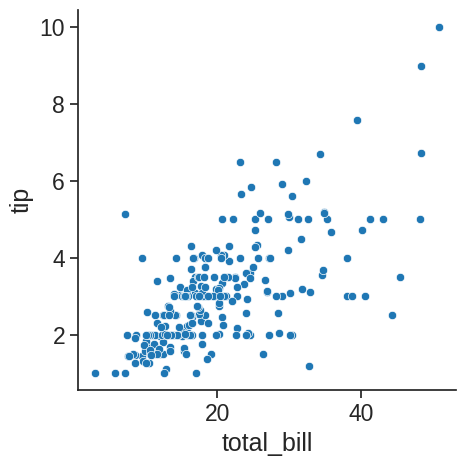

In [39]:
# Scatterplot
sns.relplot(x="total_bill", y="tip", data=tips); # Semicolon is intended to suppress text representation

While the points are plotted in two dimensions, another dimension can be added to the plot by conditioning a third variable. In seaborn, this is referred to as using a “hue/style/size semantic”, because the color/style/size of the point gains meaning:

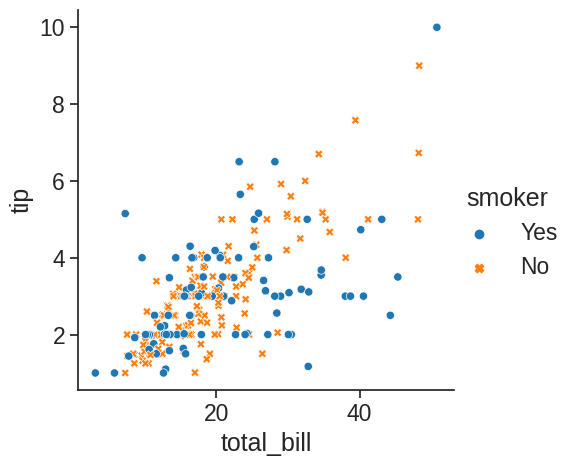

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips); # you can use a different marker style for each class

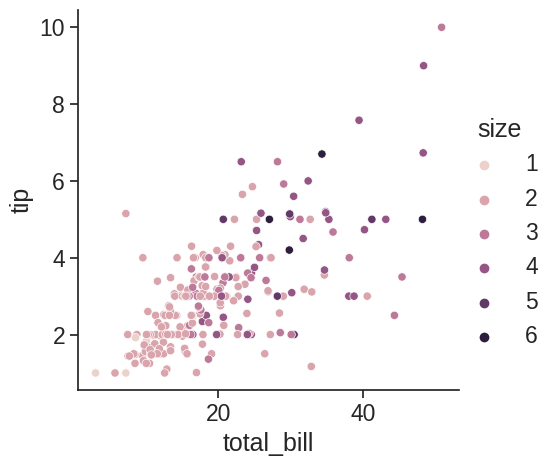

In [41]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips); #if hue is numeric rather than categorical

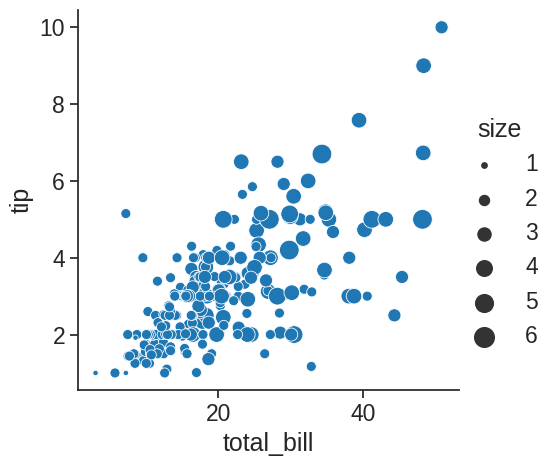

In [44]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips); #size rather than colors

Note that we can plot small multiples by using `row` and `col` variable

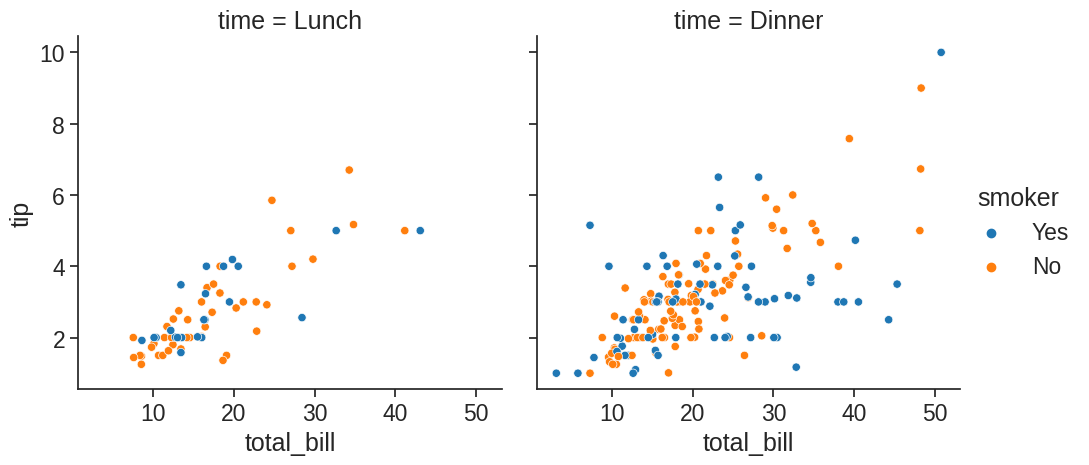

In [45]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips); #show in different subplot

### Lineplot

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot to **emphasize the continuity**.

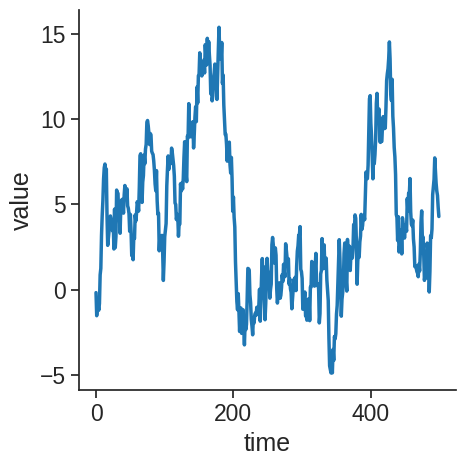

In [46]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df); # A convenient kind parameter that lets you easily switch to line plot

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean by bootstraping:

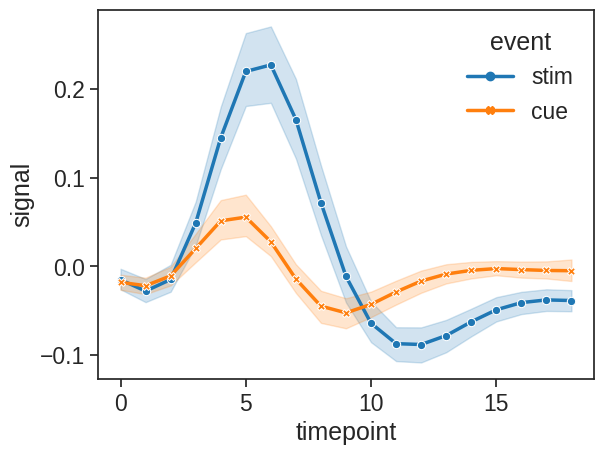

In [47]:
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", markers=True, dashes=False, data=fmri);

### Histplot

An early step in any effort to analyze or model data should be to understand **how the variables are distributed**. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

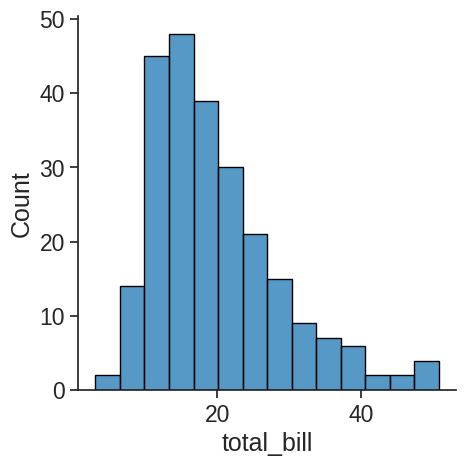

In [48]:
sns.displot(x="total_bill", data = tips); #check parameter bins and binwidth

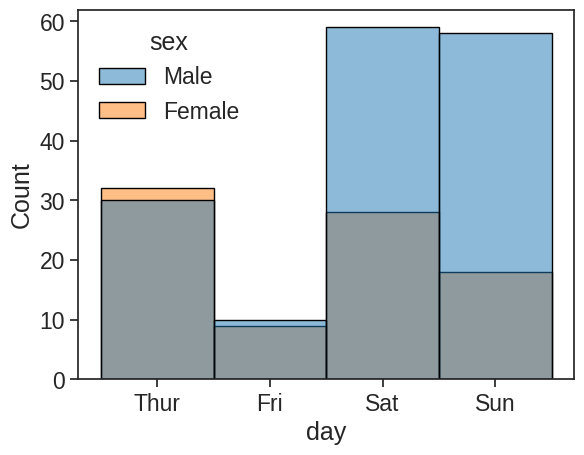

In [49]:
sns.histplot(data=tips, x="day", hue="sex"); # By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish.

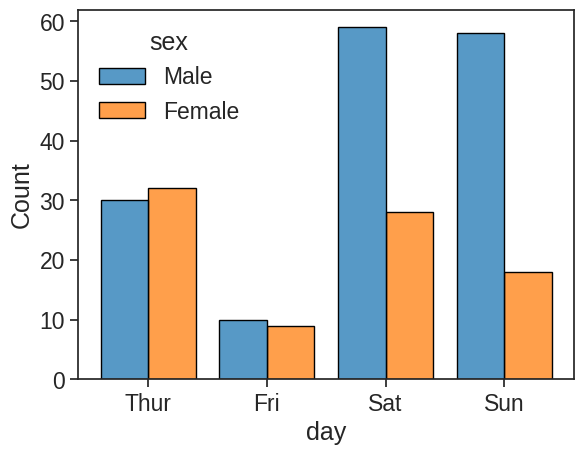

In [52]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8);

### Kdeplot

Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

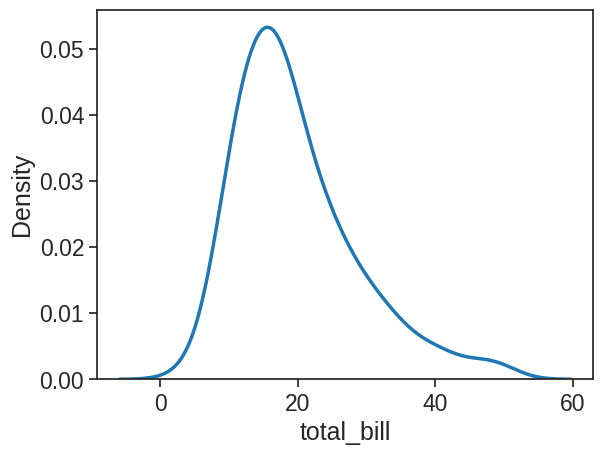

In [53]:
sns.kdeplot(data=tips, x="total_bill");

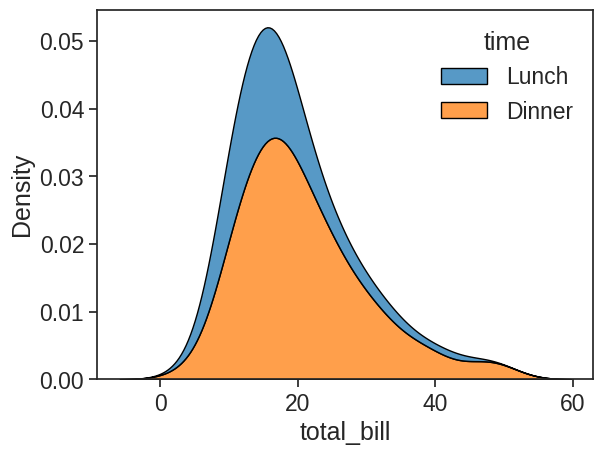

In [54]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack");

### Joinplot

`jointplot()` augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, `jointplot()` represents the bivariate distribution using `scatterplot()` and the marginal distributions using `histplot()`:

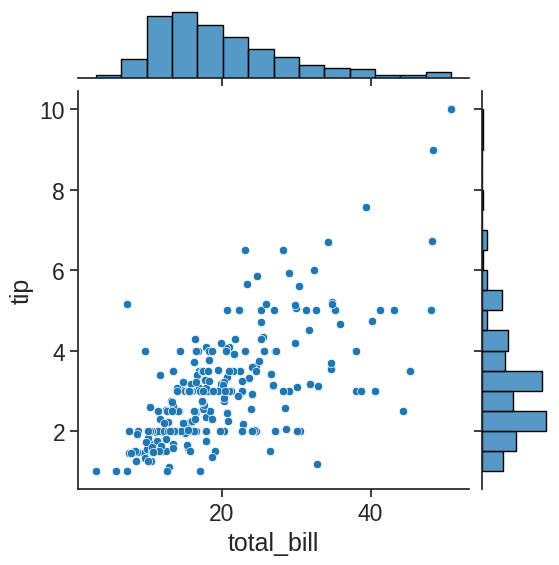

In [55]:
sns.jointplot(x="total_bill", y="tip", data=tips);

### Pairpolt

The `pairplot()` function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, `pairplot()` uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

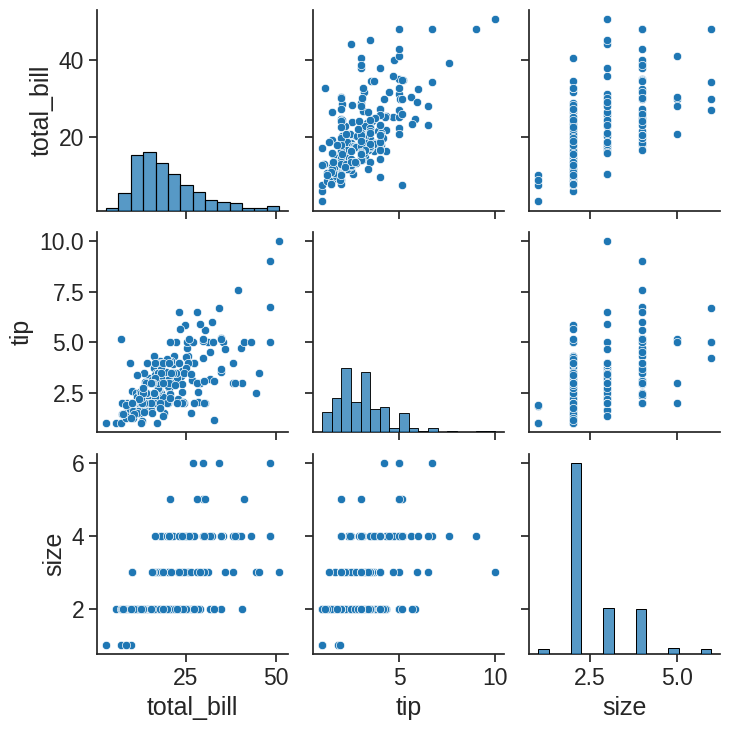

In [56]:
sns.pairplot(tips);

### Boxplot

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the **distribution** of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

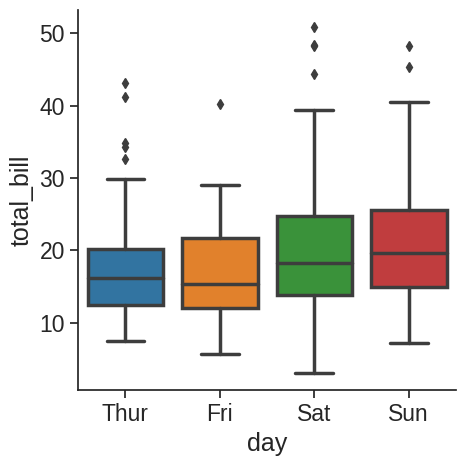

In [57]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

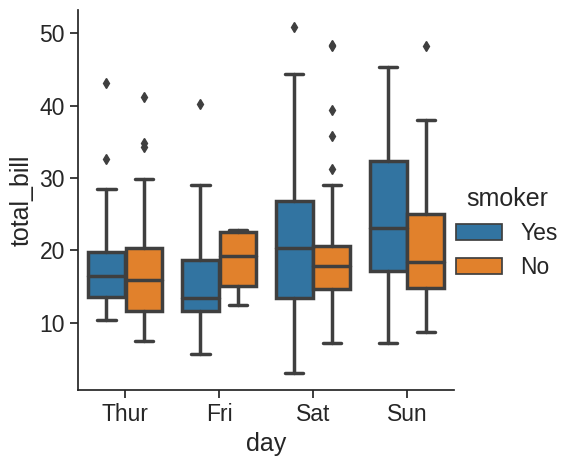

In [58]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips); # When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:b

### Barplot

Rather than showing the distribution within each category, you might want to show an estimate of the **central tendency** of the values. In seaborn, the `barplot()` function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

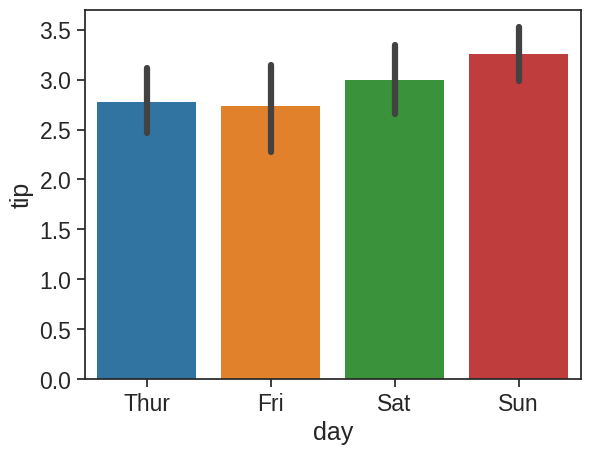

In [59]:
ax = sns.barplot(x="day", y="tip", data=tips);

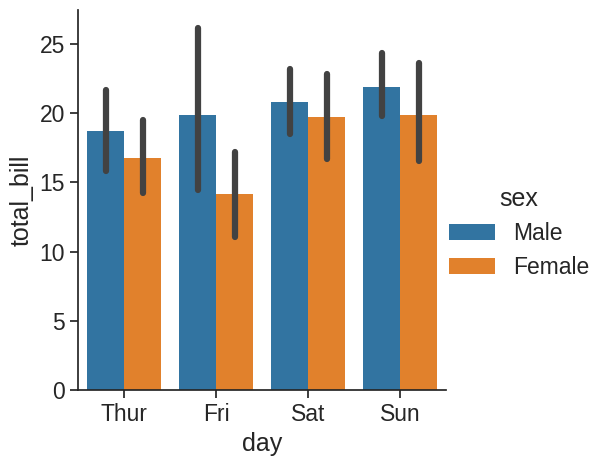

In [60]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", data=tips);

### Countplot

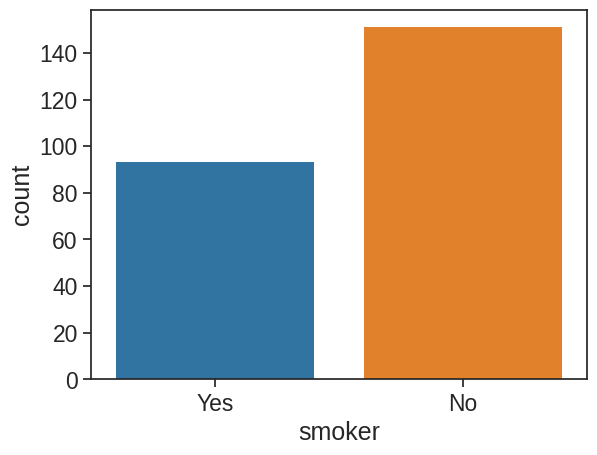

In [61]:
sns.countplot(x="smoker", data=tips); #simply count the number

### Pointplot

This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the **point estimate** and confidence interval

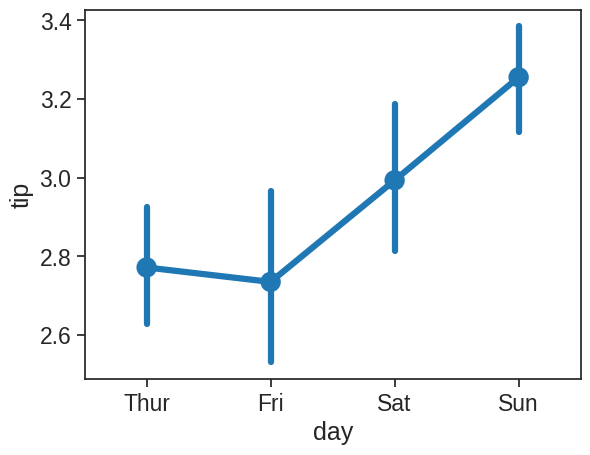

In [63]:
sns.pointplot(x="day", y="tip", data=tips, errorbar=('ci', 68));

### Regplot/lmplot

In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. The goal of `seaborn`, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

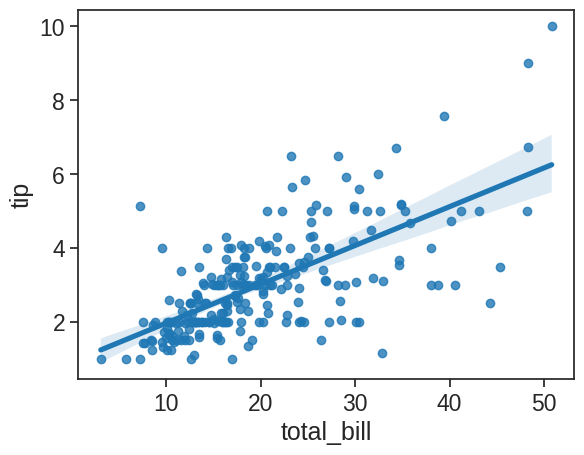

In [64]:
sns.regplot(x="total_bill", y="tip", data=tips);

When the y variable is binary, simple linear regression also “works” but provides implausible predictions. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

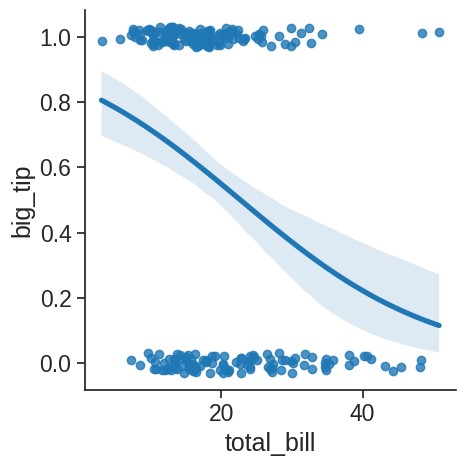

In [65]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

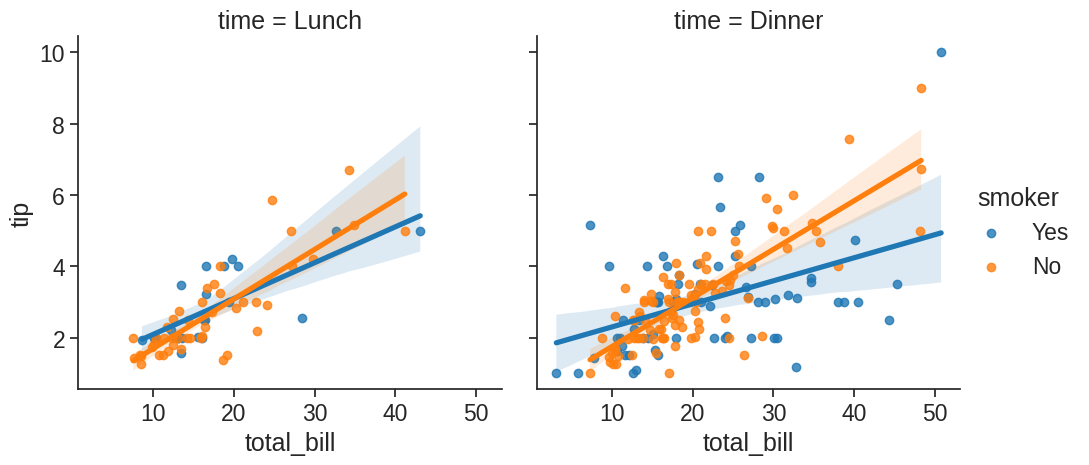

In [66]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

### Heatmap

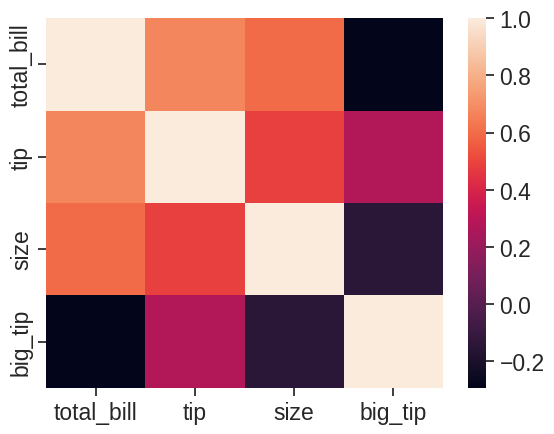

In [67]:
corr = tips.corr(numeric_only=True)
sns.heatmap(corr);

Customized your plot [https://seaborn.pydata.org/tutorial/axis_grids.html](https://seaborn.pydata.org/tutorial/axis_grids.html). For more information, see [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html).

## Lab1: Loading Datasets and processing

<center><img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg"></center>

<div align="center"> source: https://stackoverflow.com/questions/2354725/what-exactly-is-llvm </div>

Datasets available on [https://www.statlearning.com/resources-python](https://www.statlearning.com/resources-python).

In [68]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### The [Wage](https://intro-stat-learning.github.io/ISLP/datasets/Wage.html) dataset

In [69]:
# Replace DATA_PATH with your path
DATA_PATH = "/content/drive/MyDrive/00_Statistical_learning/Lab/Data/"
Wage = pd.read_csv(os.path.join(DATA_PATH,"Wage.csv"))
Wage.head(3)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [70]:
Wage.shape, Wage.columns

((3000, 11),
 Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
        'health', 'health_ins', 'logwage', 'wage'],
       dtype='object'))

In [71]:
Wage.info(), Wage.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


(None,
               year          age      logwage         wage
 count  3000.000000  3000.000000  3000.000000  3000.000000
 mean   2005.791000    42.414667     4.653905   111.703608
 std       2.026167    11.542406     0.351753    41.728595
 min    2003.000000    18.000000     3.000000    20.085537
 25%    2004.000000    33.750000     4.447158    85.383940
 50%    2006.000000    42.000000     4.653213   104.921507
 75%    2008.000000    51.000000     4.857332   128.680488
 max    2009.000000    80.000000     5.763128   318.342430)

In [72]:
Wage[Wage['year'] == 2004]['wage'].mean()

111.15999687022257

In [73]:
groupby_year = Wage.groupby('year')
for year, value in groupby_year['wage']:
    print((year, value.mean()))

(2003, 106.1982838253092)
(2004, 111.15999687022257)
(2005, 110.03785731274047)
(2006, 114.24257930246814)
(2007, 112.89455609045216)
(2008, 113.55199949510215)
(2009, 115.97177059231909)


In [74]:
groupby_year # groupby_year is a powerful object that exposes many operations on the resulting group of dataframes:

`Seaborn` combines simple statistical fits with plotting on `Pandas` dataframes.

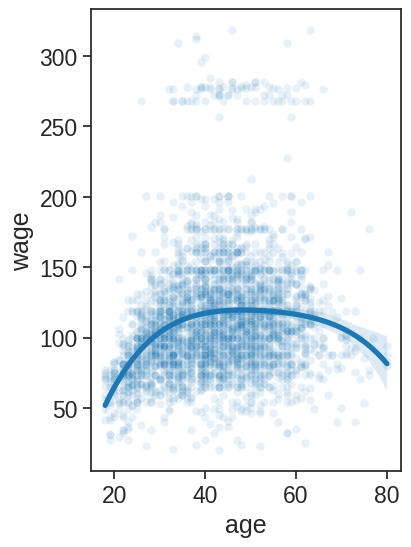

In [75]:
# creating plots
# Scatter plot with polynomial regression line, the regression line is bounded by the data limits. truncate=True.
plt.figure(figsize=(4,6))
sns.scatterplot(x="age", y="wage", data=Wage, alpha=0.1)
sns.regplot(x="age", y="wage", data=Wage, order=4, truncate=True, scatter=False);

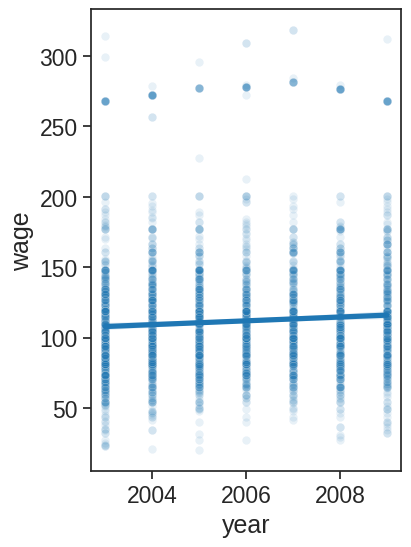

In [76]:
# creating plots
# Scatter plot with polynomial regression line
plt.figure(figsize=(4,6))
sns.scatterplot(x="year", y="wage", data=Wage, alpha=0.1)
sns.regplot(x="year", y="wage", data=Wage, order=1, truncate=True, scatter=False);

In [77]:
print(Wage.education.unique())
originalL = list(Wage.education.unique())
orderL = [originalL[0], originalL[3], originalL[2], originalL[1], originalL[4]]

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


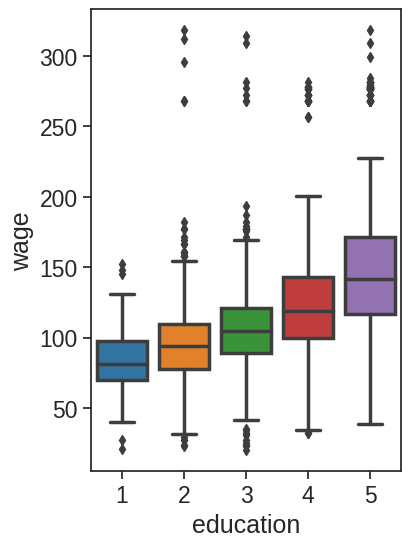

In [78]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="education", y="wage", data=Wage, order=orderL)
ax.set_xticklabels([t.get_text().split()[0][0]  for t in ax.get_xticklabels()]);

### The [S&P](https://intro-stat-learning.github.io/ISLP/datasets/Smarket.html) dataset

In [95]:
Smarket = pd.read_csv(os.path.join(DATA_PATH,"Smarket.csv"))
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [96]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


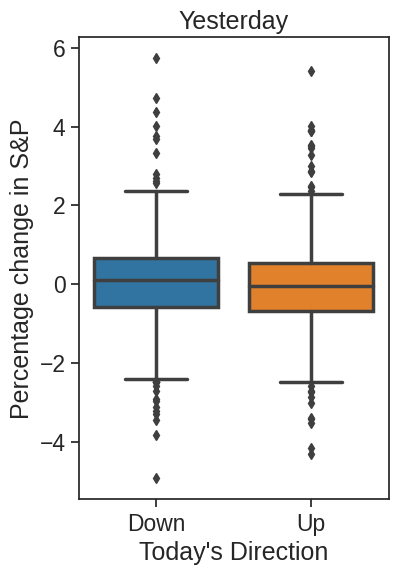

In [97]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag1", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Yesterday");

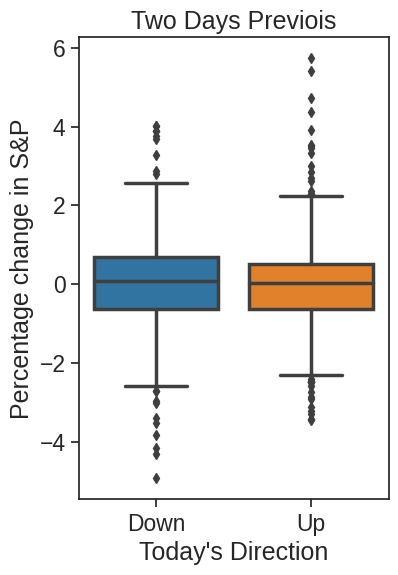

In [98]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag2", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Two Days Previois");

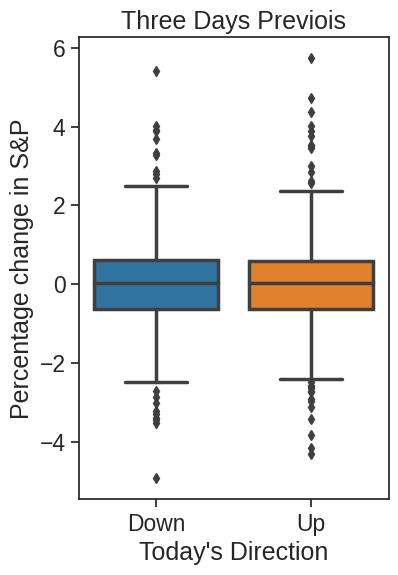

In [99]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag3", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Three Days Previois");

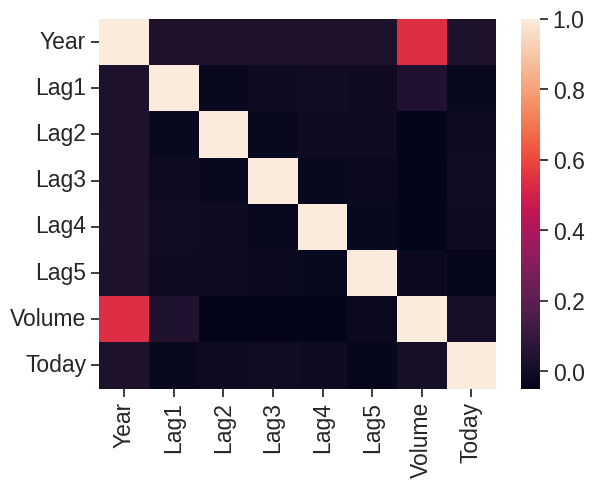

In [101]:
corr = Smarket.corr(numeric_only=True)
sns.heatmap(corr);

### The [NCI 60](https://intro-stat-learning.github.io/ISLP/datasets/NCI60.html) dataset

In [102]:
NCI60 = pd.read_csv(os.path.join(DATA_PATH,"NCI60_data.csv")).drop('Unnamed: 0', axis=1)
NCI60.columns = np.arange(NCI60.columns.size)
NCI60.head()

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [103]:
X = pd.DataFrame(scale(NCI60))
X.shape

(64, 6830)

In [104]:
y = pd.read_csv(os.path.join(DATA_PATH,"NCI60_labs.csv"), usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [105]:
y.type.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: type, dtype: int64

In [106]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
NCI60_plot = pd.DataFrame(pca2.fit_transform(X))

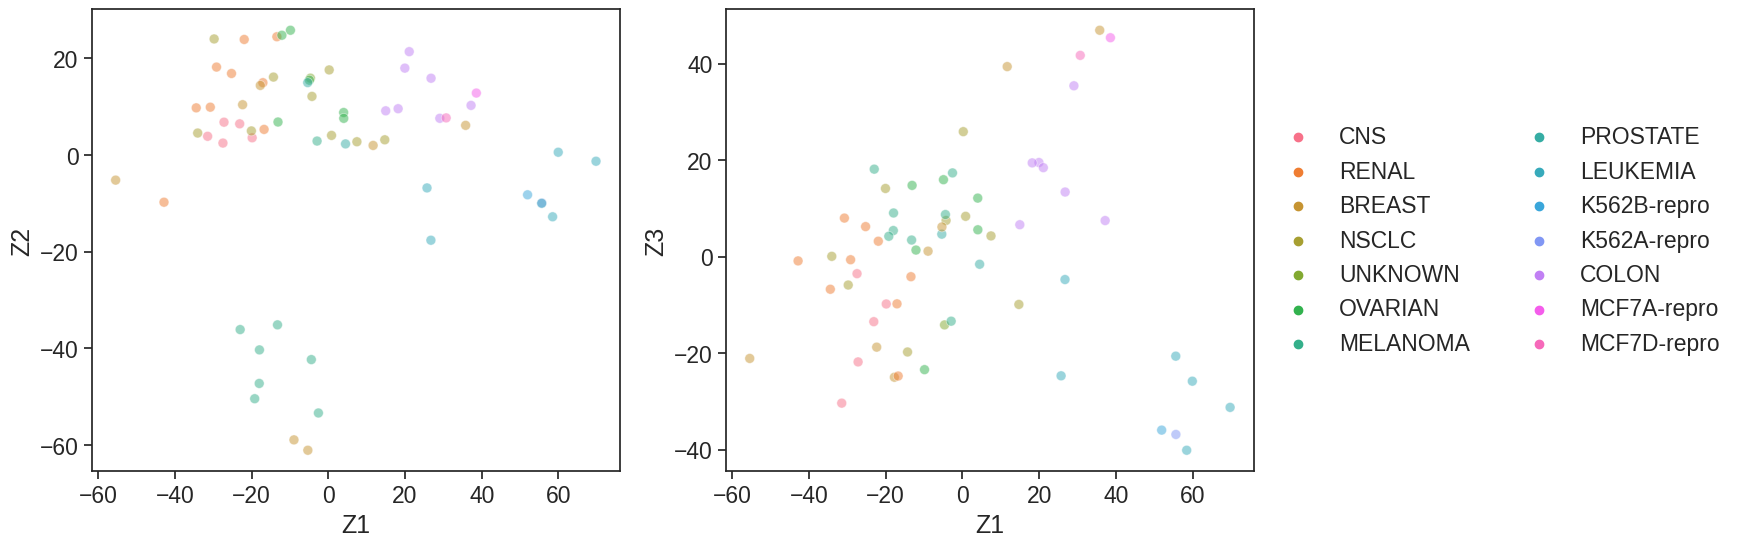

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# Left plot
sns.scatterplot(x =0, y=-NCI60_plot[1], data=NCI60_plot, hue=y.type, alpha=0.5, s=50, ax=ax1, legend=False)
ax1.set_xlabel('Z1')
ax1.set_ylabel('Z2')


# Right plot
sns.scatterplot(x = 0, y= 2, data=NCI60_plot, hue=y.type, alpha=0.5, s=50, ax=ax2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax2.set_xlabel('Z1')
ax2.set_ylabel('Z3');

### The [Auto](https://intro-stat-learning.github.io/ISLP/datasets/Auto.html) dataset

In [108]:
Auto = pd.read_csv(os.path.join(DATA_PATH,"Auto.csv")).drop('Unnamed: 0', axis=1)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [109]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


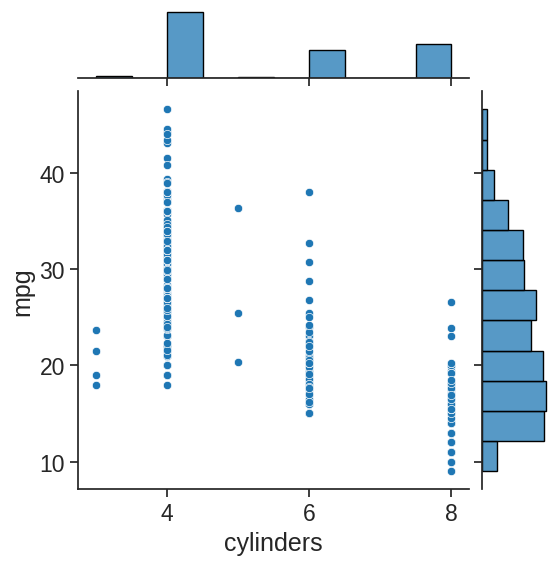

In [111]:
sns.jointplot(x="cylinders", y="mpg", data=Auto);

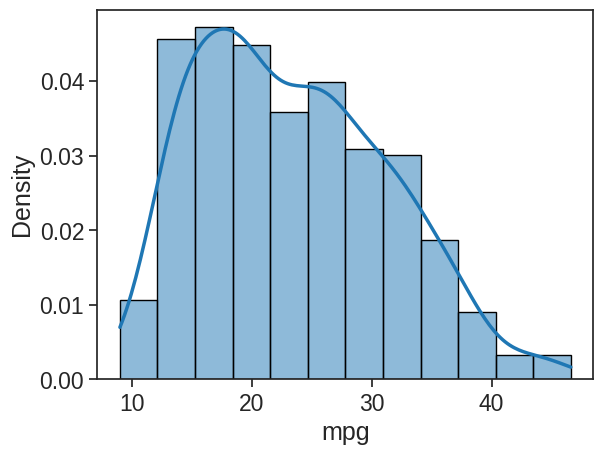

In [113]:
sns.histplot(x="mpg", kde=True, stat="density", data = Auto); #check parameter bins and binwidth

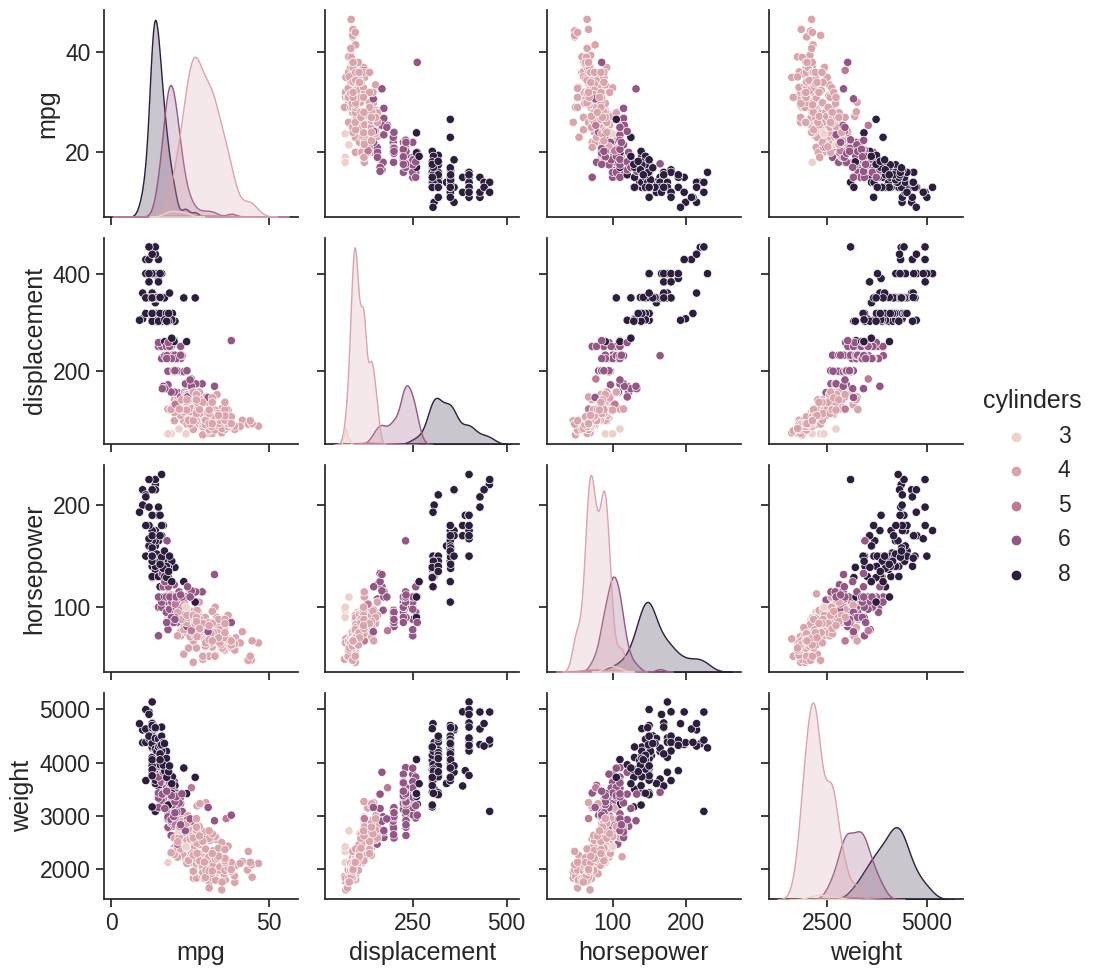

In [117]:
sns.pairplot(Auto.loc[:,["mpg","displacement", "horsepower", "weight", "cylinders"]], hue="cylinders");

### The [Bikeshare](https://intro-stat-learning.github.io/ISLP/datasets/Bikeshare.html) dataset

In [121]:
Bikeshare = pd.read_csv(os.path.join(DATA_PATH,"Bikeshare.csv")).drop('Unnamed: 0', axis=1)
Bikeshare

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [122]:
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8645 non-null   int64  
 1   mnth        8645 non-null   object 
 2   day         8645 non-null   int64  
 3   hr          8645 non-null   int64  
 4   holiday     8645 non-null   int64  
 5   weekday     8645 non-null   int64  
 6   workingday  8645 non-null   int64  
 7   weathersit  8645 non-null   object 
 8   temp        8645 non-null   float64
 9   atemp       8645 non-null   float64
 10  hum         8645 non-null   float64
 11  windspeed   8645 non-null   float64
 12  casual      8645 non-null   int64  
 13  registered  8645 non-null   int64  
 14  bikers      8645 non-null   int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 1013.2+ KB


Refer to [Lab4](https://github.com/phonchi/ISLP_labs/blob/main/Ch04-classification-lab.ipynb) or [https://phonchi.github.io/SLDM_Book/Chapter_4_Lab.html#poisson-regression](https://phonchi.github.io/SLDM_Book/Chapter_4_Lab.html#poisson-regression).